# Experian Gross to Net Income Task 1

### You should submit this notebook, the salary_holdout.csv with the populated net to gross incomes, and a word/pdf doc for task 2. Submit the csv accoridng to the format it is received, with the annual_gross_income column filled with appropriate values.

----------
Written by Lucas Murphy and Emrah Selcuk 2022

## Purpose of this task

By the end of this task you should:
    
    - have an in depth understanding of tax system used in the UK
    - be able to reverse net back into gross income
    - understand some of the challenges faced when inferring gross income from net

### Setup

Read in CSV of incomes...

In [1]:
# importing the necessary packages
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ingesting the data
df = pd.read_csv('salary_test_23.csv')

### Data Inspection

It's worthwhile to inspect your data beforehand to ensure it is as expected.

### Exploratory Data Analysis

Inspecting the structure of the dataset

In [2]:
df.head()

location  monthly_net_income  annual_gross_income
0      rou             2694.00             42302.20
1      rou             2944.66             46808.45
2      rou             1557.14             21864.27
3      rou              783.31              9399.72
4      rou             2977.18             47393.08

In [3]:
df.shape

(5000, 3)

Inspecting the dataset for any null values: there are no null values in the dataset

In [4]:
df.isna().any()

location               False
monthly_net_income     False
annual_gross_income    False
dtype: bool

Visualizing the distribution of the net income and annual gross income in the test set

<Axes: >

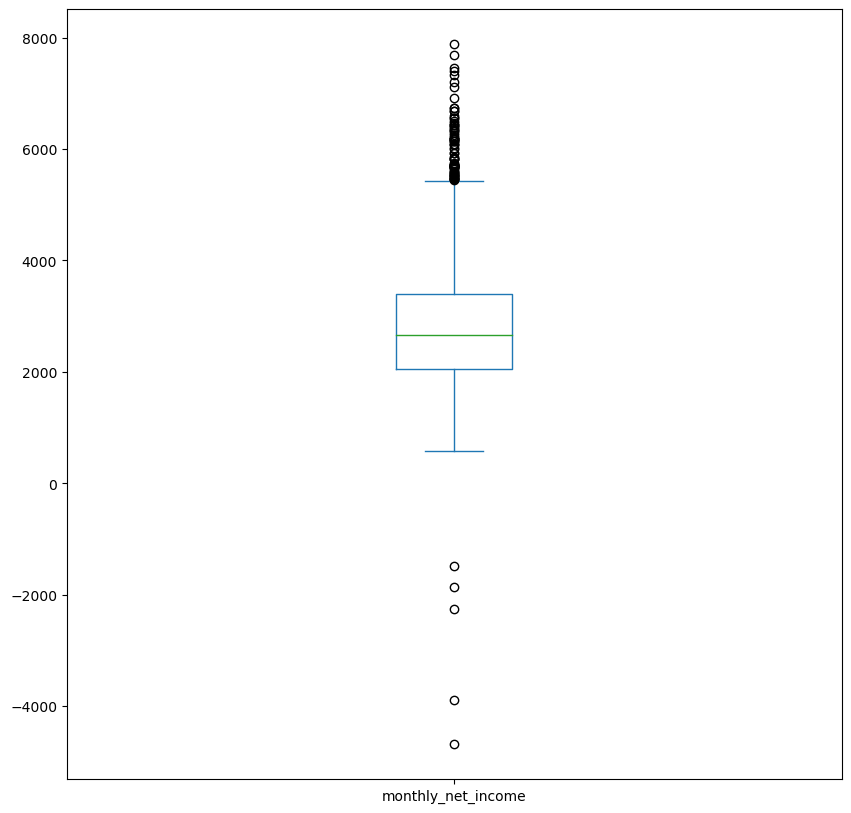

In [5]:
# monthly net income
fig,ax = plt.subplots(figsize=(10,10))
df['monthly_net_income'].plot(ax=ax,kind='box')

<Axes: >

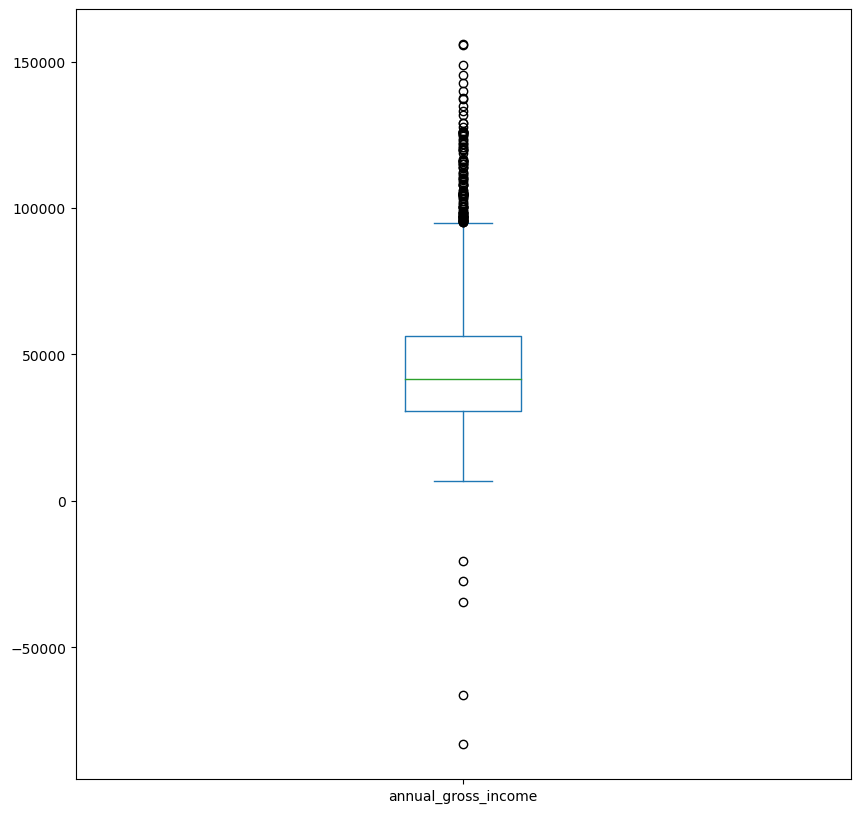

In [6]:
# annual gross income
fig,ax = plt.subplots(figsize=(10,10))
df['annual_gross_income'].plot(ax=ax,kind='box')

A visual inspection of the dataset with boxplots reveals negative monthly net income and annual gross income values. These make no sense considering the case at hand where the only deduction being considered is tax. It is impossible to be taxed more than you earn. These negative values were therefore eliminated from the test dataset. There are 5 records with negative values of monthly net income and annual gross income

In [7]:
# eliminating negative values
df = df[(df['monthly_net_income']>0) & (df['annual_gross_income']>0)]
df.shape

(4995, 3)

### Functionality

Write a program that converts monthly net income to annual gross income. You can assume that the monthly income is constant month to month. It is *strongly* advised to first write functionality to convert gross to net and confirm this with the provided test set. Your grade for this section will be based solely on your calculations for the holdout set.

For transparency, write your algorithm according to the tax brackets and rates communicated in the presentation slides.

For this task, an algorithm was first developed to convert gross income to net income. Then, making net income the subject, the formula was reversed to develop and algorithm that converted net income to gross income

Forward Algorithm: Gross to net

The formulae below, convert the annual gross income to the annual net income. These formulae were fundamental to the development of the final algorithm. Reversing these formula then yielded the final net to gross algorithm

In [8]:
# the formula below takes into account both the National Insurance and Income Tax
def rou_gross_to_net(gross_income):
    # considering the national insurance threshold
    if gross_income<=11904:
        annual_net_income = gross_income
        return annual_net_income
    # considering the personal allowance threshold
    elif (gross_income>11904 and gross_income<=12570):
        annual_net_income = gross_income-((gross_income-11904)*0.1325)
        return annual_net_income
    # basic rate and corresponding NI tax
    elif (gross_income>12570 and gross_income<=50270):
        annual_net_income = gross_income-(((gross_income-11904)*0.1325)+((gross_income-12570)*0.2))
        return annual_net_income
    # higher rate - with no personal allowance lost
    elif(gross_income>50270 and gross_income<=100000):
        annual_net_income = gross_income - (((50270-12570)*0.2)+((gross_income-50270)*0.4)+((50270-11904)*0.1325)+((gross_income-50270)*0.0325))
        return annual_net_income
    # higher rate, losing personal allowance up to the maximum personal allowance that can be lost
    elif(gross_income>100000 and gross_income<=125140):
        annual_net_income = gross_income - (((50270 - 12570) * 0.2) + ((gross_income - 50270) * 0.4 ) + ((50270 - 11904) * 0.1325) + ((gross_income - 50270) * 0.0325) + (((gross_income - 100000)/2) * 0.4))
        return annual_net_income
    # additional rate, all personal allowance is lost at this stage
    elif(gross_income>125140):
        annual_net_income = gross_income - (((50270 - 12570) * 0.2) + ((125140 - 50270) * 0.4 ) + ((50270 - 11904) * 0.1325) + ((gross_income - 50270) * 0.0325) + (((125140 - 100000)/2) * 0.4) + ((gross_income - 125140) * 0.45))
        return annual_net_income

In [9]:
# the formula below takes into account both the National Insurance Tax and Income Tax to compute the net income from the gross income
def sco_gross_to_net(gross_income):
    # considering the National Insurance Threshold
    if gross_income<=11904:
        annual_net_income = gross_income
        return annual_net_income
    # considering the personal allowance threshold and national insurance tax
    elif (gross_income>11904 and gross_income<=12570):
        annual_net_income = gross_income - ((gross_income - 11904) * 0.1325)
        return annual_net_income
    # considering the starter rate and national insurance tax
    elif(gross_income>12570 and gross_income<=14732):
        annual_net_income = gross_income - (((gross_income - 11904) * 0.1325) + ((gross_income - 12570) * 0.19))
        return annual_net_income
    # considering the basic rate and national insurance tax
    elif(gross_income>14732 and gross_income<=25688):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((gross_income - 14732) * 0.2) + ((gross_income - 11904) * 0.1325))
        return annual_net_income
    # intermediate rate and national insurance tax
    elif(gross_income>25688 and gross_income<=43662):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((25688 - 14732) * 0.2) + ((gross_income - 25688) * 0.21) + ((gross_income - 11904) * 0.1325))
        return annual_net_income
    # higher rate and national insurance tax
    elif(gross_income>43663 and gross_income<=50270):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((25688 - 14732) * 0.2) + ((43662 - 25688) * 0.21) + ((gross_income - 43662) * 0.42) + ((gross_income - 11904) * 0.1325))
        return annual_net_income
    # higher rate, upto point before personal allowance is lost
    elif(gross_income>50271 and gross_income<=100000):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((25688 - 14732) * 0.2 ) + ((43662 - 25688) * 0.21) + ((gross_income - 43662) * 0.42) + ((50270 - 11904) * 0.1325) + ((gross_income - 50270) * 0.0325))
        return annual_net_income
    # beginning of the personal allowance loss
    elif(gross_income>100000 and gross_income<=125140):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((25688 - 14732) * 0.2) + ((43662 - 25688) * 0.21) + ((gross_income - 43662) * 0.42) + ((50270 - 11904) * 0.1325) + ((gross_income - 50270) * 0.0325) + ((gross_income -100000)/2 * 0.42))
        return annual_net_income
    # top rate - scotland
    elif(gross_income>125140):
        annual_net_income = gross_income - (((14732 - 12570) * 0.19) + ((25688 - 14732) * 0.2 ) + ((43662 - 25688) * 0.21) +  ((125140 - 43662) * 0.42) + ((50270 - 11904) * 0.1325) + ((gross_income - 50270) * 0.0325) + (((125140 - 100000)/2) * 0.42) + ((gross_income - 125140) * 0.47))
        return annual_net_income

Below two calculations create dummy net income brackets needed for further functioning

In [10]:
#ROU Gross income tax slabs and national insurance slabs all limits:
g1= 0
g2 = 11904 #comes from national insurance slab
g3 = 12570
g4 = 50270
g5 = 100000 #comes from special case
g6 = 125140


#Income Tax for 0 to 11904:
i1 = g1
#Income Tax for 11904 t0 12570:
i2 = g1
#Income tax for 12570 to 50270:
i3 = (g4 - g3)* 0.2 #where 20% is tax percentage
#Income tax for 50270 t0 100000:
i4 = (g4 - g3)* 0.2 + (g5 - g4)* 0.4 #where 20% & 40% is tax percentage
#Income tax for 100000 t0 125140:
i5 = (g4 - g3)* 0.2 + (g6 - g4)* 0.4 #where 20% & 40% is tax percentage


#NIT for gross income 0 to 11904 is 0: 
n1 = 0
#NIT for gross income 11905 to 12570 
n2 = (g3 - g2) * 0.1325 #where 13.25% is NIT percentage
#NIT for gross income 12570 to 50270 
n3 = (g4 - g3) * 0.1325 #where 13.25% is NIT percentage
#NIT for gross income 50270 to 100000 
n4 = (g4 - g2) * 0.1325 + (g5 - g4) * 0.0325 #where 3.25% is NIT percentage
#NIT for gross income 100000 to 125140 
n5 = (g4 - g2) * 0.1325 + (g6 - g4) * 0.0325 #where 3.25% is NIT percentage


# Personal Allowance taper = ((Upper Limit - Lower Limit)/2)* income tax percentage for special case
pat=((g6 - g5)/2) * 0.4 #where 40% is tax percentage

#for rest other cases pat is taken 0 as it doesnt apply:
pat0 = 0

#Creating dummy brackets for net income
d1 = g2 - i1- n1- pat0  #taken from g2 as we are only calculating upper limits and g2 is first upper limit
d2 = g3 - i2- n2- pat0 
d3 = g4 - i3- n3- pat0 
d4 = g5 - i4- n4- pat0 
d5 = g6 - i5- n5- pat   #pat is taken for special case

In [11]:
print(d1,d2,d3,d4,d5)

11904 12481.755 37734.75 65868.28 75107.23


In [12]:
#Scotland Gross income tax slabs and national insurance slabs all limits:
scot_g1 = 0
scot_g2 = 11904.00 #comes from national insurance slab
scot_g3 = 12570.00
scot_g4 = 14732.00
scot_g5 = 25688.00
scot_g6 = 43662.00
scot_g7 = 50270.00
scot_g8 = 100000.00 #comes from special case
scot_g9 = 125140.00


# Income Tax for 0 to 11904:
scot_i1 = scot_g1  # Tax is 0 for this income range
# Income Tax for 11904 to 12570:
scot_i2 = scot_g1  # Tax is 0 for this income range
# Income tax for 12570 to 14733:
scot_i3 = (scot_g4 - scot_g3) * 0.19  # 19% tax rate applied 
# Income tax for 14733 to 25689:
scot_i4 = (scot_g4 - scot_g3) * 0.19 + (scot_g5 - scot_g4) * 0.20  # 19% and 20% tax applied
# Income tax for 25689 to 43663:
scot_i5 = (scot_g4 - scot_g3) * 0.19 + (scot_g5 - scot_g4) * 0.20 + (scot_g6 - scot_g5) * 0.21 # 19%,20%,21% tax applied
# Income tax for 43663 to 50271:
scot_i6 = (scot_g4 - scot_g3) * 0.19 + (scot_g5 - scot_g4) * 0.20 + (scot_g6 - scot_g5) * 0.21 + (scot_g7 - scot_g6) * 0.42 # 19%,20%,21%, 42% tax applied
# Income tax for 50271 to 100000:
scot_i7 = (scot_g4 - scot_g3) * 0.19 + (scot_g5 - scot_g4) * 0.20 + (scot_g6 - scot_g5) * 0.21 + (scot_g8 - scot_g6) * 0.42  # 19%,20%,21%, 42% tax applied
# Income tax for 100000 to 125141:
scot_i8 = (scot_g4 - scot_g3) * 0.19 + (scot_g5 - scot_g4) * 0.20 + (scot_g6 - scot_g5) * 0.21 + (scot_g9 - scot_g6) * 0.42  # 19%,20%,21%, 42% tax applied



# National Insurance Tax (NIT) for gross income 0 to 11904 is 0:
scot_n1 = 0
# NIT for gross income 11905 to 12571:
scot_n2 = (scot_g3 - scot_g2) * 0.1325  # 13.25% NIT applied to income 
# NIT for gross income 12571 to 14733:
scot_n3 = (scot_g4 - scot_g2) * 0.1325  # 13.25% NIT applied to income 
# NIT for gross income 14733 to 25689:
scot_n4 = (scot_g5 - scot_g2) * 0.1325  # 13.25% NIT applied to income 
# NIT for gross income 25689 to 43663:
scot_n5 = (scot_g6 - scot_g2) * 0.1325  # 13.25% NIT applied to income 
# NIT for gross income 43663 to 50271:
scot_n6 = (scot_g7 - scot_g2) * 0.1325  # 13.25% NIT applied to income 
# NIT for gross income 50271 to 100000:
scot_n7 = (scot_g7 - scot_g2) * 0.1325 + (scot_g8 - scot_g7) * 0.0325 # 13.25% NIT and 3.25% NIT applied
# NIT for gross income 100000 to 125140:
scot_n8 = (scot_g7 - scot_g2) * 0.1325 + (scot_g9 - scot_g7) * 0.0325  # 13.25% NIT and 3.25% NIT applied


# Personal Allowance taper = ((Upper Limit - Lower Limit)/2)* income tax percentage for special case
scot_pat=((scot_g9 - scot_g8)/2) * 0.42 #where 42% is tax percentage
#for rest other cases pat is taken 0 as it doesnt apply:
scot_pat0 = 0

#Creating dummy brackets for net income
scot_d1 = scot_g2 - scot_i1 - scot_n1 - scot_pat0 
scot_d2 = scot_g3 - scot_i2 - scot_n2 - scot_pat0 
scot_d3 = scot_g4 - scot_i3 - scot_n3 - scot_pat0  
scot_d4 = scot_g5 - scot_i4 - scot_n4 - scot_pat0  
scot_d5 = scot_g6 - scot_i5 - scot_n5 - scot_pat0
scot_d6 = scot_g7 - scot_i6 - scot_n6 - scot_pat0
scot_d7 = scot_g8 - scot_i7 - scot_n7 - scot_pat0  #for the special case
scot_d8 = scot_g9 - scot_i8 - scot_n8 - scot_pat  


### The Net to Gross Function

Basing on the above two forward functions, the net to gross function was formulated by reversing the above two formuale to make the gross income the subject. For example, for an individual residing in Scotland and earning a gross salary between than 11904 and 12570, they would only have to pay national insurance tax and their annual net income would be calculated by the following formula:
annual_net_income = gross_income - ((gross_income-11904)*0.1325). 
This formula can be reversed to make the gross income the subject:
gross_income = (annual_net_income - 11904*0.1325)/(1-0.1325)

In addition, for we created brackets for the net income values, basing on the total tax paid and the corresponding gross income values.
For example: For an individual residing in the rest of UK and earning a gross income between 11904 and 12570, the corresponding annual net income range for these values can be computed as follows:
Lower range stays the same: 11904
Upper range : 12570 - National Insurance Tax - Income Tax = 12570 - (12570-11904)*0.1325 -0 = 12481.76

So the corresponding possible net income range is 11904 to 12481.76 for an annual income between 11904 and 12570. 

This logic was applied to both the scotland and Rest of Uk data to come up with the Net to Gross functions below

In [13]:
# The net to gross scotland function
def net_to_gross_sco(net):
     # if net income is below, 11905, then no tax was deducted and that is the gross
    if net < scot_d1:
        return round(net,2)
    # first net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d1 <= net < scot_d2: 
        gross = (net - (scot_g2*0.1325))/(1-0.1325)
        return round(gross,2)
    # second net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d2 <= net < scot_d3:
        gross = (net - (scot_g2*0.1325) - (scot_g3*0.19))/(1-0.1325-0.19)
        return round(gross,2)
    # third net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d3 <= net < scot_d4:
        gross = (net + ((scot_g4-scot_g3)*0.19) - (scot_g4*0.2) - (scot_g2*0.1325))/(1-0.2-0.1325)
        return round(gross,2)
    # fourth net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d4 <= net < scot_d5:
        gross = (net + ((scot_g4-scot_g3)*0.19) + ((scot_g5-scot_g4)*0.2) - (scot_g5*0.21) - (scot_g2*0.1325))/(1-0.21-0.1325)
        return round(gross,2)
     # fifth net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d5 <= net < scot_d6:
        gross = (net + ((scot_g4-scot_g3)*0.19) + ((scot_g5-scot_g4)*0.2) + ((scot_g6-scot_g5)*0.21) - (scot_g6*0.42) - (scot_g2*0.1325))/(1-0.42-0.1325)
        return round(gross,2)
    # sixth net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d6 <= net < scot_d7:
        gross = (net + ((scot_g4-scot_g3)*0.19) + ((scot_g5-scot_g4)*0.2) + ((scot_g6-scot_g5)*0.21) - (scot_g6*0.42) + ((scot_g7-scot_g2)*0.1325) - (scot_g7*0.0325))/(1-0.42-0.0325)
        return round(gross,2)
     # seventh net income bracket, add the corresponding taxes and work upwards to get gross
    elif scot_d7 <= net < scot_d8: 
        gross = (net + ((scot_g4-scot_g3)*0.19) + ((scot_g5-scot_g4)*0.2) + ((scot_g6-scot_g5)*0.21) - (scot_g6*0.42) + ((scot_g7-scot_g2)*0.1325) - (scot_g7*0.0325) - (scot_g8/2*0.42))/(1-0.42-0.0325-0.42/2)
        return round(gross,2)
    elif net >= scot_d8:
        gross = (net + ((scot_g4-scot_g3)*0.19) + ((scot_g5-scot_g4)*0.2) + ((scot_g6-scot_g5)*0.21) + ((scot_g9-scot_g6)*0.42) + ((scot_g7-scot_g2)*0.1325) - (scot_g7*0.0325) + ((scot_g9-scot_g8)/2)*0.42 - (scot_g9*0.47))/(1-0.47-0.0325)
        return round(gross,2)

In [14]:
# The net_to_gross_uk function
def net_to_gross_rou(net):
    # if net income is below, 11905, then no tax was deducted and that is the gross
    if net < d1:
        return round(net,2)
    # first net income bracket, add the corresponding taxes and work upwards to get gross
    elif d1 <= net < d2:
        gross = (net - (g2*0.1325))/(1-0.1325)
        return round(gross,2)
    # second net income bracket, add the corresponding taxes and work upwards to get gross
    elif d2 <= net < d3:
        gross = (net - (g2*0.1325) - (g3*0.2))/(1-0.1325-0.2)
        return round(gross,2)
    # third net income bracket, add the corresponding taxes and work upwards to get gross
    elif d3 <= net < d4:
        gross = (net + ((g4-g3)*0.2) - (g4*0.4) + ((g4-g2)*0.1325) - (g4*0.0325))/(1-0.0325-0.4)
        return round(gross,2)
    # fourth net income bracket, add the corresponding taxes and work upwards to get gross
    elif d4 <= net < d5:   
        gross = (net + ((g4-g3)*0.2) - (g4*0.4) + ((g4-g2)*0.1325) - (g4*0.0325) - (g5/2*0.4))/(1-0.0325-0.4-0.4/2)
        return round(gross,2)
    # fifth net income bracket, add the corresponding taxes and work upwards to get gross
    elif net >= d5:
        gross = (net + ((g4-g3)*0.2) + ((g6-g4)*0.4) + ((g4-g2)*0.1325) - (g4*0.0325) + ((g6-g5)/2*0.4)- (g6*0.45))/(1-0.0325-0.45)
        return round(gross,2)

### Evaluating the developed algorithm on the test set

Computing the predicted annual gross income using the developed algorithm

The developed function was first evaluated on the rest of uk data, scotland data and finally on the entire dataset

ROU Evaluation

In [15]:
# ROU_Apply the net_to_gross function to 'annual_net_income' column and store results in 'predicted_annual_gross_income'
df3 = df[df['location'] == 'rou'].copy()
df3['annual_net_income'] = df3['monthly_net_income'] * 12
df3['predicted_annual_gross_income'] = df3['annual_net_income'].apply(net_to_gross_rou)
df3

location  monthly_net_income  annual_gross_income  annual_net_income  \
0         rou             2694.00             42302.20           32328.00   
1         rou             2944.66             46808.45           35335.92   
2         rou             1557.14             21864.27           18685.68   
3         rou              783.31              9399.72            9399.72   
4         rou             2977.18             47393.08           35726.16   
...       ...                 ...                  ...                ...   
4994      rou             1272.25             16742.65           15267.00   
4995      rou             1204.16             15518.56           14449.92   
4996      rou             1394.35             18937.71           16732.20   
4997      rou             2127.01             32109.12           25524.12   
4998      rou             1022.83             12330.47           12273.96   

      predicted_annual_gross_income  
0                          42302.20  
1                          46808.45  
2                          21864.27  
3                           9399.72  
4                          47393.08  
...                             ...  
4994                       16742.65  
4995                       15518.56  
4996                       18937.71  
4997                       32109.12  
4998                       12330.47  

[4013 rows x 5 columns]

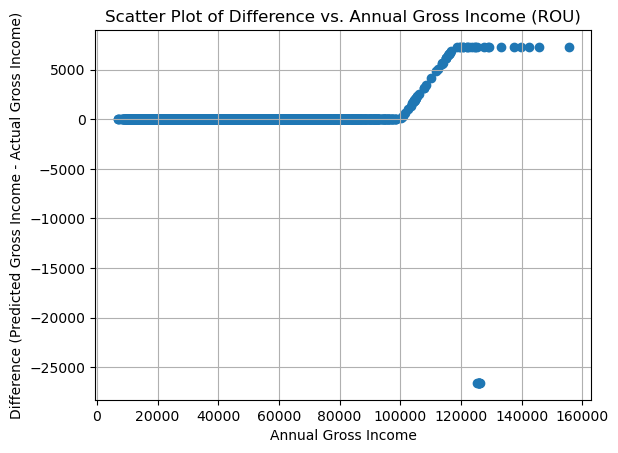

In [16]:
# Calculate the difference between 'predicted_annual_gross_income' and 'annual_gross_income'
df3['gross_income_difference'] = df3['predicted_annual_gross_income'] - df3['annual_gross_income']

# Plot the difference against 'annual_net_income'
plt.scatter(df3['annual_gross_income'], df3['gross_income_difference'])
plt.xlabel('Annual Gross Income')
plt.ylabel('Difference (Predicted Gross Income - Actual Gross Income)')
plt.title('Scatter Plot of Difference vs. Annual Gross Income (ROU)')
plt.grid(True)
plt.show()

In [17]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df3['annual_gross_income'], df3['predicted_annual_gross_income'])
 
# Calculate the mean of the actual gross incomes
mean_actual_income = df3['annual_gross_income'].mean()
 
# Calculate the margin of error as a percentage
margin_of_error = (mae / mean_actual_income) * 100
 
print(f"Margin of Error: {margin_of_error:.2f}%")

Margin of Error: 0.26%


Scotland Evaluation:

In [18]:
# Sco_Apply the net_to_gross function to 'annual_net_income' column and store results in 'predicted_annual_gross_income'
df4 = df[df['location'] == 'sco'].copy()
df4['annual_net_income'] = df4['monthly_net_income'] * 12
df4['predicted_annual_gross_income'] = df4['annual_net_income'].apply(net_to_gross_sco)
df4

location  monthly_net_income  annual_gross_income  annual_net_income  \
16        sco             2206.11             33617.55           26473.32   
24        sco             1878.17             27632.33           22538.04   
41        sco             3004.41             50303.42           36052.92   
42        sco             2433.61             37769.64           29203.32   
43        sco             4086.96             74030.54           49043.52   
...       ...                 ...                  ...                ...   
4976      sco             2750.31             43549.72           33003.72   
4984      sco             2275.11             34876.87           27301.32   
4988      sco             3699.34             65534.76           44392.08   
4989      sco             2688.80             42427.10           32265.60   
4999      sco             1575.25             22157.45           18903.00   

      predicted_annual_gross_income  
16                         33617.55  
24                         27632.33  
41                         50303.42  
42                         37769.64  
43                         74030.54  
...                             ...  
4976                       43549.72  
4984                       34876.87  
4988                       65534.76  
4989                       42427.10  
4999                       22157.45  

[982 rows x 5 columns]

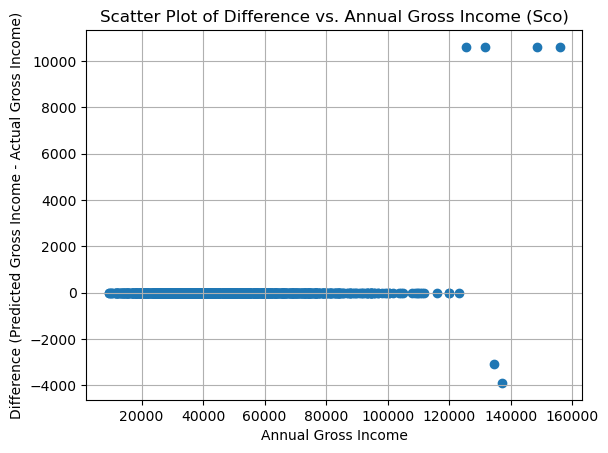

In [19]:
# Calculate the difference between 'predicted_annual_gross_income' and 'annual_gross_income'
df4['gross_income_difference'] = df4['predicted_annual_gross_income'] - df4['annual_gross_income']

# Plot the difference against 'annual_net_income'
plt.scatter(df4['annual_gross_income'], df4['gross_income_difference'])
plt.xlabel('Annual Gross Income')
plt.ylabel('Difference (Predicted Gross Income - Actual Gross Income)')
plt.title('Scatter Plot of Difference vs. Annual Gross Income (Sco)')
plt.grid(True)
plt.show()

In [20]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df4['annual_gross_income'], df4['predicted_annual_gross_income'])
 
# Calculate the mean of the actual gross incomes
mean_actual_income = df4['annual_gross_income'].mean()
 
# Calculate the margin of error as a percentage
margin_of_error = (mae / mean_actual_income) * 100
 
print(f"Margin of Error: {margin_of_error:.2f}%")

Margin of Error: 0.11%


Evaluating the overall test dataset with both Scotland and ROU values

In [21]:
# Create a copy of the dataset
df2 = df.copy()

# Create the annual net income column
df2['annual_net_income'] = df2['monthly_net_income'] * 12

df2.head()

location  monthly_net_income  annual_gross_income  annual_net_income
0      rou             2694.00             42302.20           32328.00
1      rou             2944.66             46808.45           35335.92
2      rou             1557.14             21864.27           18685.68
3      rou              783.31              9399.72            9399.72
4      rou             2977.18             47393.08           35726.16

In [22]:
def predict_gross(record):
    if(record['location']=='rou'):
        return net_to_gross_rou(record['annual_net_income'])
    elif(record['location']=='sco'):
        return net_to_gross_sco(record['annual_net_income'])
df2['predicted_annual_gross_income'] = df2.apply(predict_gross,axis=1)
df2

location  monthly_net_income  annual_gross_income  annual_net_income  \
0         rou             2694.00             42302.20           32328.00   
1         rou             2944.66             46808.45           35335.92   
2         rou             1557.14             21864.27           18685.68   
3         rou              783.31              9399.72            9399.72   
4         rou             2977.18             47393.08           35726.16   
...       ...                 ...                  ...                ...   
4995      rou             1204.16             15518.56           14449.92   
4996      rou             1394.35             18937.71           16732.20   
4997      rou             2127.01             32109.12           25524.12   
4998      rou             1022.83             12330.47           12273.96   
4999      sco             1575.25             22157.45           18903.00   

      predicted_annual_gross_income  
0                          42302.20  
1                          46808.45  
2                          21864.27  
3                           9399.72  
4                          47393.08  
...                             ...  
4995                       15518.56  
4996                       18937.71  
4997                       32109.12  
4998                       12330.47  
4999                       22157.45  

[4995 rows x 5 columns]

Plotting the prediction error for the different annual gross incomes, using a scatter plot

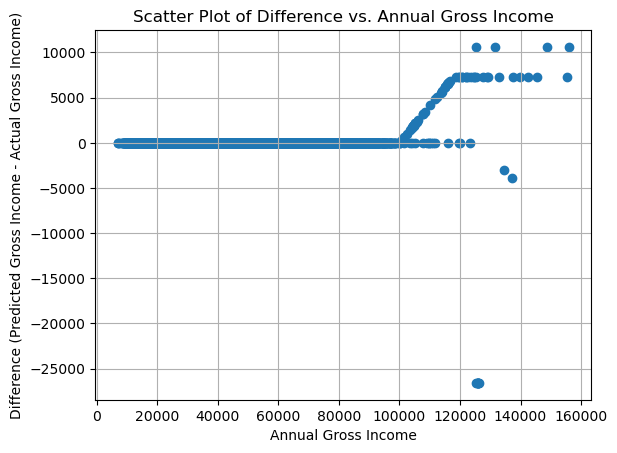

In [23]:
# Calculate the difference between 'predicted_annual_gross_income' and 'annual_gross_income'
df2['gross_income_difference'] = df2['predicted_annual_gross_income'] - df2['annual_gross_income']

# Plot the difference against 'annual_net_income'
plt.scatter(df2['annual_gross_income'], df2['gross_income_difference'])
plt.xlabel('Annual Gross Income')
plt.ylabel('Difference (Predicted Gross Income - Actual Gross Income)')
plt.title('Scatter Plot of Difference vs. Annual Gross Income')
plt.grid(True)
plt.show()

From the above plot, most of the errors in the observed were above annual gross income values of 100000.  

Evaluating the prediction on the test set using metrics such as the mean absolute error, r2 score and margin of error

In [24]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df2['annual_gross_income'], df2['predicted_annual_gross_income'])
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(df2['annual_gross_income'], df2['predicted_annual_gross_income'])
print(f"R2 score: {r2}")
 
# Calculate the mean of the actual gross incomes
mean_actual_income = df2['annual_gross_income'].mean()
 
# Calculate the margin of error as a percentage
margin_of_error = (mae / mean_actual_income) * 100
 
print(f"Margin of Error: {margin_of_error:.2f}%")

Mean Absolute Error: 103.47726126126125
R2 score: 0.9967465110270259
Margin of Error: 0.23%


In [25]:
df2.head()

location  monthly_net_income  annual_gross_income  annual_net_income  \
0      rou             2694.00             42302.20           32328.00   
1      rou             2944.66             46808.45           35335.92   
2      rou             1557.14             21864.27           18685.68   
3      rou              783.31              9399.72            9399.72   
4      rou             2977.18             47393.08           35726.16   

   predicted_annual_gross_income  gross_income_difference  
0                       42302.20                      0.0  
1                       46808.45                      0.0  
2                       21864.27                      0.0  
3                        9399.72                      0.0  
4                       47393.08                      0.0

Investigating the distribution of the error

In [26]:
# Calculate the absolute difference between 'predicted_annual_net_income' and 'annual_net_income'
df2['abs_net_income_difference'] = abs(df2['predicted_annual_gross_income'] - df2['annual_gross_income'])
df2['abs_net_income_difference'].describe()

count     4995.000000
mean       103.477261
std       1192.957834
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26579.740000
Name: abs_net_income_difference, dtype: float64

The distribution of the error below reveals that the error is distributed close to 0, for most data points

<Axes: ylabel='Frequency'>

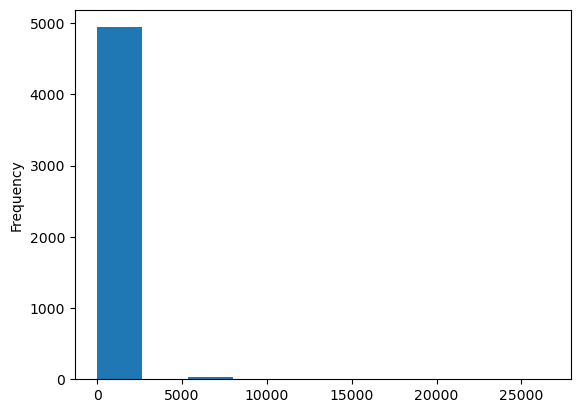

In [27]:
fig,ax = plt.subplots()
df2['abs_net_income_difference'].plot(ax=ax,kind='hist')

### Making Predictions on the Hold Out set

In [28]:
# reading the data
holdout = pd.read_csv('salary_holdout_23.csv')

In [29]:
holdout.head()

location  monthly_net_income  annual_gross_income
0      rou             4337.10                  0.0
1      sco             1678.07                  0.0
2      rou             2096.05                  0.0
3      rou             2816.73                  0.0
4      sco             2645.94                  0.0

In [30]:
# writing the prediction function
def predict_gross(record):
    if(record['location']=='rou'):
        annual_net = 12*record['monthly_net_income']
        return net_to_gross_rou(annual_net)
    elif(record['location']=='sco'):
        annual_net = 12*record['monthly_net_income']
        return net_to_gross_sco(annual_net)

# performing the prediction
holdout['annual_gross_income'] = holdout.apply(predict_gross,axis=1)

In [31]:
holdout.head()

location  monthly_net_income  annual_gross_income
0      rou             4337.10             75642.15
1      sco             1678.07             24005.90
2      rou             2096.05             31552.54
3      rou             2816.73             44508.58
4      sco             2645.94             41644.87

Saving the edited file to disk

In [32]:
holdout.to_csv('salary_holdout_23.csv', index=False)